* Link to the dataset: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

# About the dataset
* This dataset gives you information about a marketing campaign of a financial institution, which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.
## Input variables explained:
### bank client data:<br> 
1 - age (numeric)<br> 
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br> 
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br> 
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br> 
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br> 
6 - balance: average yearly balance, in euros (numeric)
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br> 
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br> 
### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')<br> 
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br> 
11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br> 
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br> 
### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br> 
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br> 
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br> 
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br> 
## Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')
* Deposite definition: What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better  than just opening deposit account) in which your money will be returned back at a specific maturity time. 

## Approach
In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:
* Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.
* Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.
* Here some categorical columns have values "unknown". We are considering it as one category which can influence the deposite status. Hence not removing it.
* Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

### Import linear algebra and data manipulation libraries

In [1023]:
import pandas as pd
import numpy as np
%matplotlib inline 
#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [1024]:
df=pd.read_csv("bank.csv")

# 1. DATA PREPROCESSING

## Checking for Missing values

In [1025]:
df.isna().count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [1026]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Slicing the dataset instances to 1500

In [1027]:
df1=df.sample(n=1500,random_state=0)

In [1028]:
df1=df1.sort_index()
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes
16,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes
33,40,blue-collar,married,secondary,no,10,yes,no,unknown,9,may,1692,2,-1,0,unknown,yes
39,23,entrepreneur,single,primary,no,4,yes,no,unknown,13,may,395,2,-1,0,unknown,yes
42,45,entrepreneur,divorced,tertiary,no,-395,yes,no,unknown,13,may,470,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,40,blue-collar,married,primary,no,2171,yes,no,unknown,9,may,97,1,-1,0,unknown,no
11143,38,unemployed,divorced,secondary,no,189,yes,yes,cellular,21,jul,105,2,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no


# Inserting missing values

* Have inserted 10% missing values into the dataset as the dataset is clean

In [1029]:
np.random.seed(0)
df2 = df1.mask(np.random.random(df1.shape) < .10)

In [1030]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
9,28.0,services,single,secondary,no,5090.0,yes,no,unknown,6.0,may,1297.0,3.0,-1.0,NaN,NaN,NaN
16,32.0,blue-collar,single,primary,no,611.0,yes,no,unknown,8.0,may,541.0,3.0,-1.0,0.0,unknown,yes
33,NaN,blue-collar,married,secondary,no,10.0,yes,no,unknown,NaN,may,1692.0,2.0,-1.0,0.0,unknown,yes
39,23.0,entrepreneur,single,primary,no,4.0,yes,no,unknown,13.0,may,395.0,2.0,-1.0,0.0,unknown,NaN
42,45.0,NaN,divorced,tertiary,no,-395.0,yes,NaN,unknown,13.0,may,470.0,1.0,-1.0,NaN,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11128,40.0,blue-collar,married,primary,no,2171.0,yes,no,NaN,9.0,may,97.0,1.0,-1.0,0.0,unknown,no
11143,38.0,unemployed,divorced,secondary,no,189.0,yes,yes,cellular,21.0,jul,105.0,2.0,-1.0,0.0,unknown,no
11155,35.0,blue-collar,married,secondary,no,NaN,yes,yes,cellular,NaN,nov,38.0,2.0,172.0,2.0,NaN,NaN
11156,34.0,blue-collar,NaN,secondary,no,NaN,yes,no,cellular,7.0,jul,273.0,5.0,-1.0,0.0,unknown,no


In [1031]:
missing_values= df2.isna().mean().round(2)
missing_values.sum()

1.7700000000000002

* we can see that there is nearly 10% of missing values in the data, hence lets explore data by categorical and numerical column wise.

## Check for missing values in outcome variable-deposit
* If the deposit variable has missing values, then it is better to do row deletion.

In [1032]:
df3 = df2.dropna(how='all', subset=['deposit'])

### Fill missing values 
* with most frequent values in categorical columns
* with mean in numerical columns(as we have only less than 10% of the data is missing, filling with average should not decrease the variance much to deviate our predictions.)

In [1033]:
df_cat_imputed=df3.select_dtypes(include='object').fillna(df3.select_dtypes(include='object').mode().iloc[0])
df_cat_imputed

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
16,blue-collar,single,primary,no,yes,no,unknown,may,unknown,yes
33,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,yes
42,management,divorced,tertiary,no,yes,no,unknown,may,unknown,yes
46,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
48,technician,divorced,primary,no,yes,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11103,management,married,primary,no,no,no,unknown,may,unknown,no
11128,blue-collar,married,primary,no,yes,no,cellular,may,unknown,no
11143,unemployed,divorced,secondary,no,yes,yes,cellular,jul,unknown,no
11156,blue-collar,married,secondary,no,yes,no,cellular,jul,unknown,no


In [1034]:
df_num_imputed=df3.select_dtypes(exclude ='object').fillna(df3.select_dtypes(exclude='object').mean().iloc[0])

In [1035]:
df_imputed = pd.concat([df_cat_imputed, df_num_imputed], axis=1)
df_imputed

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,balance,day,duration,campaign,pdays,previous
16,blue-collar,single,primary,no,yes,no,unknown,may,unknown,yes,32.000000,611.000000,8.000000,541.0,3.000000,-1.0,0.000000
33,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,yes,41.235053,10.000000,41.235053,1692.0,2.000000,-1.0,0.000000
42,management,divorced,tertiary,no,yes,no,unknown,may,unknown,yes,45.000000,-395.000000,13.000000,470.0,1.000000,-1.0,41.235053
46,technician,married,secondary,no,yes,no,unknown,may,unknown,yes,43.000000,3285.000000,13.000000,1721.0,41.235053,-1.0,41.235053
48,technician,divorced,primary,no,yes,no,unknown,may,unknown,yes,53.000000,1443.000000,14.000000,476.0,1.000000,-1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11103,management,married,primary,no,no,no,unknown,may,unknown,no,51.000000,98.000000,7.000000,114.0,2.000000,-1.0,41.235053
11128,blue-collar,married,primary,no,yes,no,cellular,may,unknown,no,40.000000,2171.000000,9.000000,97.0,1.000000,-1.0,0.000000
11143,unemployed,divorced,secondary,no,yes,yes,cellular,jul,unknown,no,38.000000,189.000000,21.000000,105.0,2.000000,-1.0,0.000000
11156,blue-collar,married,secondary,no,yes,no,cellular,jul,unknown,no,34.000000,41.235053,7.000000,273.0,5.000000,-1.0,0.000000


In [1036]:
df_imputed.isna().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
deposit      0
age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

* We will check how the categorical columns are distributed

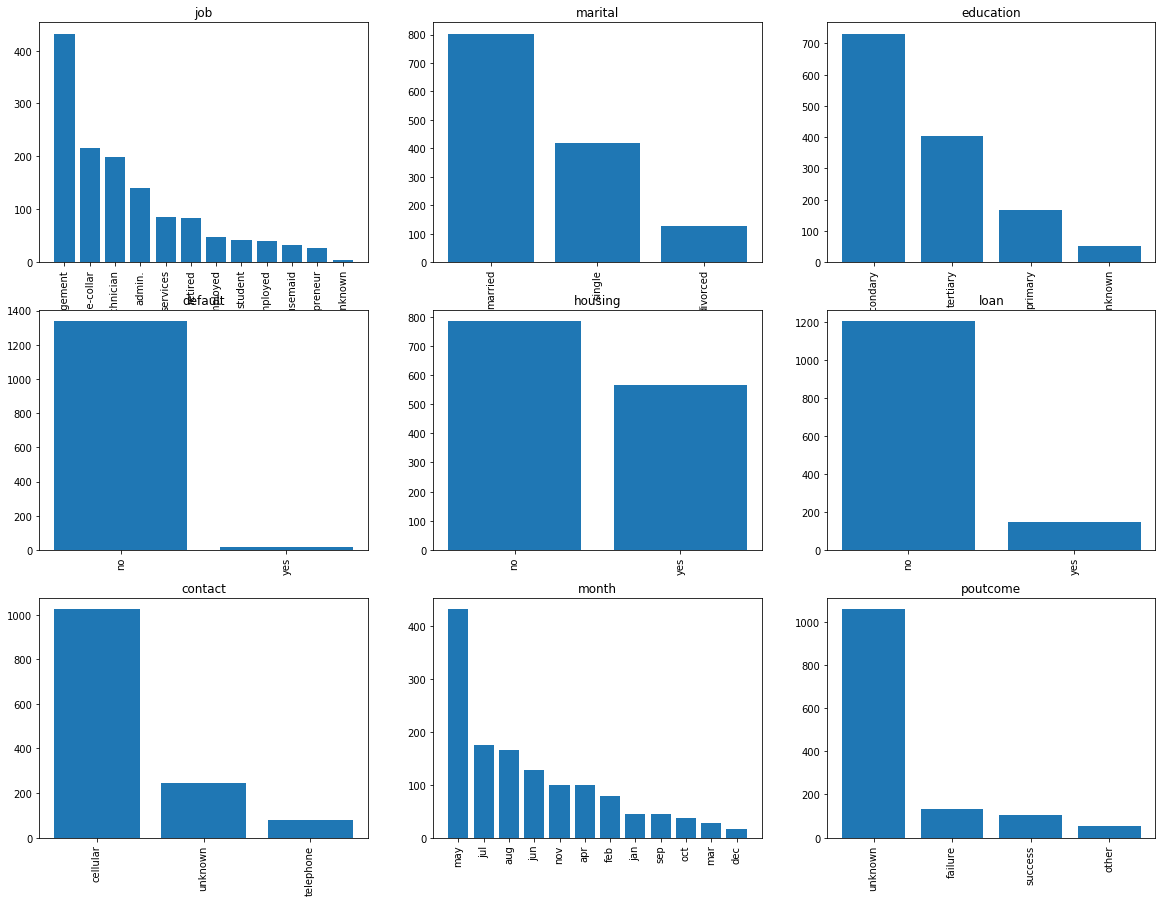

In [1037]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))
counter = 0
for cat_column in cat_columns:
    value_counts = df_imputed[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1

plt.show()

* We will look at the numerical columns

In [1038]:
num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']
df3_num=df_imputed[num_columns]
df3_num

,age,balance,day,duration,campaign,pdays,previous
16,32.000000,611.000000,8.000000,541.0,3.000000,-1.0,0.000000
33,41.235053,10.000000,41.235053,1692.0,2.000000,-1.0,0.000000
42,45.000000,-395.000000,13.000000,470.0,1.000000,-1.0,41.235053
46,43.000000,3285.000000,13.000000,1721.0,41.235053,-1.0,41.235053
48,53.000000,1443.000000,14.000000,476.0,1.000000,-1.0,0.000000
...,...,...,...,...,...,...,...
11103,51.000000,98.000000,7.000000,114.0,2.000000,-1.0,41.235053
11128,40.000000,2171.000000,9.000000,97.0,1.000000,-1.0,0.000000
11143,38.000000,189.000000,21.000000,105.0,2.000000,-1.0,0.000000
11156,34.000000,41.235053,7.000000,273.0,5.000000,-1.0,0.000000


/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


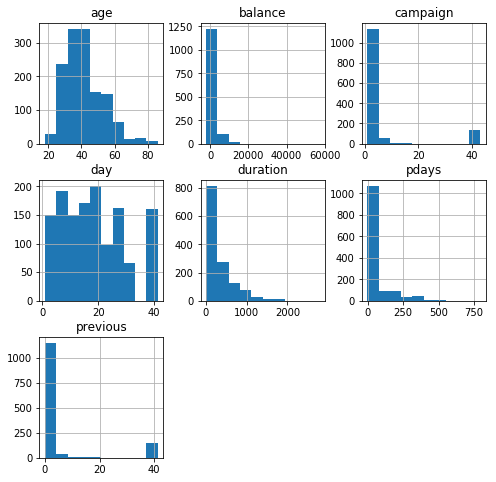

In [1039]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df3_num.hist(ax=ax)
plt.show()

* We can see from the above graphs, that balance,campaign, duration, pdays and previous variables have some outliers. lets look at those columns

In [1040]:
df3_num.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,41.235053,1349.049473,18.985636,337.573046,6.322416,48.423113,5.167076
std,11.253845,2856.263077,11.420474,340.739668,11.901728,100.547597,12.753442
min,18.000000,-2049.000000,1.000000,6.000000,1.000000,-1.000000,0.000000
25%,33.000000,41.235053,9.000000,107.000000,1.000000,-1.000000,0.000000
50%,41.000000,432.500000,18.000000,218.500000,2.000000,-1.000000,0.000000
75%,48.000000,1511.750000,27.000000,454.750000,4.000000,41.235053,2.000000
max,86.000000,56831.000000,41.235053,2770.000000,43.000000,792.000000,41.235053


## Handling Outliers
We can see that duration, pdays have outliers

In [1041]:
df_imputed.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,41.005427,1196.088409,19.280096,209.953193,6.270095,34.146423,4.660296
yes,41.499837,1525.430412,18.646091,484.732781,6.382749,64.885707,5.751450


In [1042]:
len(df_imputed[df_imputed['pdays'] > 400] ) / len(df_imputed) * 100

0.8888888888888888

In [1043]:
len(df_imputed[df_imputed['pdays'] == -1.0])/len(df_imputed)*100

67.77777777777779

Box plot to show outliers in pdays

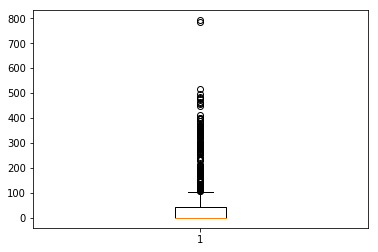

In [1044]:
plt.boxplot(df_imputed['pdays'])
plt.show()

Removing Outliers from pdays column

In [1045]:
print(df_imputed['pdays'].quantile(0.10))
print(df_imputed['pdays'].quantile(0.90))

-1.0
185.0


In [1046]:
df_imputed['pdays'] = np.where(df_imputed['pdays'] >185.0, 185.0,df_imputed['pdays'])

Box plot to show outliers in duration

In [1047]:
len (df_imputed[df_imputed['duration'] > 1700] ) / len(df_imputed) * 100

0.7407407407407408

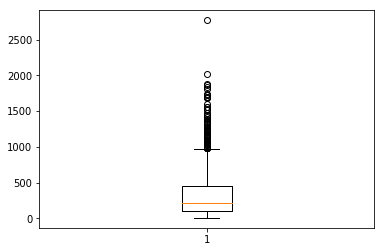

In [1048]:
plt.boxplot(df_imputed['duration'])
plt.show()

Removing Outliers from duration column

In [1049]:
print(df_imputed['duration'].quantile(0.10))
print(df_imputed['duration'].quantile(0.90))

41.23505323505323
815.1000000000001


In [1050]:
df_imputed['duration'] = np.where(df_imputed['duration'] >815.1, 815.1,df_imputed['duration'])

## Response column(y)-Deposit
On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

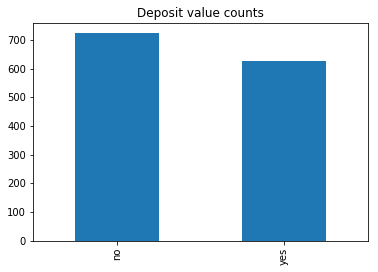

In [1051]:
value_counts = df_imputed['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

In [1052]:
df_imputed.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,41.235053,1349.049473,18.985636,304.786750,6.322416,36.540891,5.167076
std,11.253845,2856.263077,11.420474,251.911856,11.901728,65.513610,12.753442
min,18.000000,-2049.000000,1.000000,6.000000,1.000000,-1.000000,0.000000
25%,33.000000,41.235053,9.000000,107.000000,1.000000,-1.000000,0.000000
50%,41.000000,432.500000,18.000000,218.500000,2.000000,-1.000000,0.000000
75%,48.000000,1511.750000,27.000000,454.750000,4.000000,41.235053,2.000000
max,86.000000,56831.000000,41.235053,815.100000,43.000000,185.000000,41.235053


In [1053]:
df_imputed.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,41.005427,1196.088409,19.280096,203.091229,6.270095,24.659563,4.660296
yes,41.499837,1525.430412,18.646091,422.052877,6.382749,50.241369,5.751450


## Heatmap to check correlation between variables

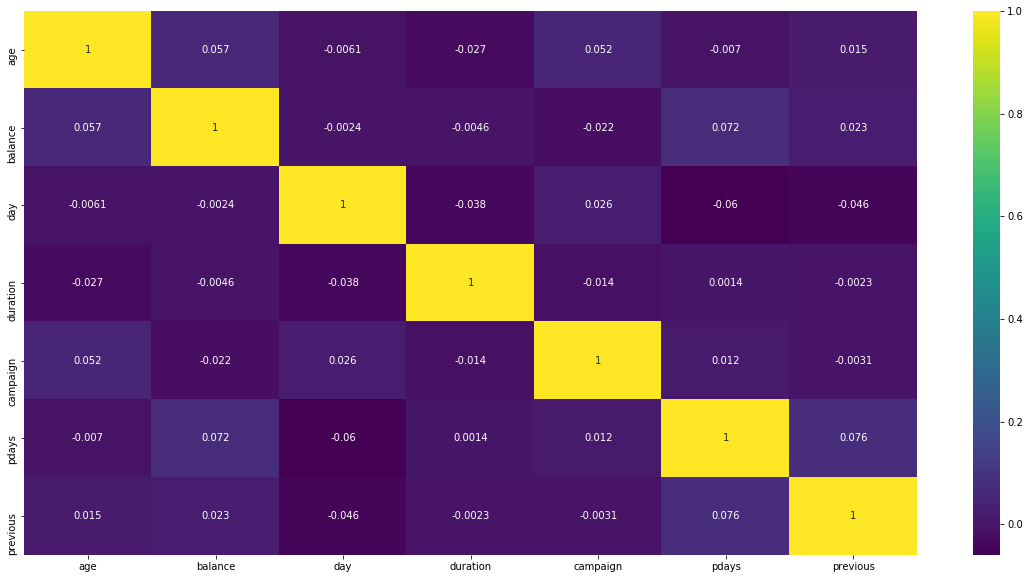

In [1054]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_imputed.corr(), annot=True, cmap='viridis')

In [1055]:
# Build correlation matrix
corr = df_imputed.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0567754,-0.00611563,-0.0272737,0.0520022,-0.0069992,0.0150551
balance,0.0567754,1,-0.00238168,-0.00461993,-0.0218494,0.0723836,0.0230234
day,-0.00611563,-0.00238168,1,-0.0383794,0.0264391,-0.0596583,-0.0457402
duration,-0.0272737,-0.00461993,-0.0383794,1,-0.0144605,0.00142835,-0.00232041
campaign,0.0520022,-0.0218494,0.0264391,-0.0144605,1,0.0124053,-0.00312825
pdays,-0.0069992,0.0723836,-0.0596583,0.00142835,0.0124053,1,0.0755292
previous,0.0150551,0.0230234,-0.0457402,-0.00232041,-0.00312825,0.0755292,1


* From the above heatmap, it seems like there is no correlation between input numerical variables, hence we do not need to drop any variables

## Creating dummies for categorical variables

In [1056]:
print("Unique levels in 'job' variable:", df_imputed.job.nunique())
print("Unique levels in 'marital' variable:", df_imputed.marital.nunique())
print("Unique levels in 'education' variable:", df_imputed.education.nunique())
print("Unique levels in 'default' variable:", df_imputed.default.nunique())
print("Unique levels in 'housing' variable:", df_imputed.housing.nunique())
print("Unique levels in 'loan' variable:", df_imputed.loan.nunique())
print("Unique levels in 'contact' variable:", df_imputed.contact.nunique())
print("Unique levels in 'month' variable:", df_imputed.month.nunique())
print("Unique levels in 'poutcome' variable:", df_imputed.poutcome.nunique())
print("Unique levels in 'deposit' variable:", df_imputed.deposit.nunique())

Unique levels in 'job' variable: 12
Unique levels in 'marital' variable: 3
Unique levels in 'education' variable: 4
Unique levels in 'default' variable: 2
Unique levels in 'housing' variable: 2
Unique levels in 'loan' variable: 2
Unique levels in 'contact' variable: 3
Unique levels in 'month' variable: 12
Unique levels in 'poutcome' variable: 4
Unique levels in 'deposit' variable: 2


* From the information above, we will create one-hot encoding for categorical variables with > 2 levels. So, 'job',  'marital', 'education', 'contact', 'month' and 'poutcome' variables have levels >2.
* For 'default', 'housing', 'loan' and 'deposit' variables, we use create label encoding as they have just 2 unique levels.

In [1057]:
dummy1= pd.get_dummies(df_imputed, columns=['job', 'marital', 'education','contact', 'month','poutcome'],
               drop_first=False, prefix=['job', 'mar', 'edu', 'con', 'mon', 'pout'])

In [1058]:
dummy2=dummy1.replace(to_replace = ['yes','no'],value = ['1','0'])
#dummy2.info()
df_conv=dummy2.copy()
df_conv.head()

,default,housing,loan,deposit,age,balance,day,duration,campaign,pdays,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,pout_failure,pout_other,pout_success,pout_unknown
16,0,1,0,1,32.000000,611.0,8.000000,541.0,3.000000,-1.0,...,0,0,1,0,0,0,0,0,0,1
33,0,1,0,1,41.235053,10.0,41.235053,815.1,2.000000,-1.0,...,0,0,1,0,0,0,0,0,0,1
42,0,1,0,1,45.000000,-395.0,13.000000,470.0,1.000000,-1.0,...,0,0,1,0,0,0,0,0,0,1
46,0,1,0,1,43.000000,3285.0,13.000000,815.1,41.235053,-1.0,...,0,0,1,0,0,0,0,0,0,1
48,0,1,0,1,53.000000,1443.0,14.000000,476.0,1.000000,-1.0,...,0,0,1,0,0,0,0,0,0,1


In [1059]:
y = df_conv.deposit
X = df_conv.drop(['deposit'], axis=1)

## Feature Selection

For selecting feautres we will use random forest method because it is robust, nonlinear

In [1060]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X_sc = pd.DataFrame(scaled_features,columns=X.columns)

In [1061]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators = 50, max_depth = 4,random_state=0)

scores = []
num_features = len(X_sc.columns)
for i in range(num_features):
    col = X_sc.columns[i]
    score = np.mean(cross_val_score(clf, X_sc[col].values.reshape(-1,1), y, cv=10))
    scores.append((float(score*100), col))

print(sorted(scores, reverse = True))

[(66.80556368484375, 'duration'), (61.06522940851299, 'pdays'), (60.61261502942802, 'pout_success'), (60.54944233082951, 'pout_unknown'), (58.99548824504925, 'previous'), (58.454037004519876, 'age'), (56.829732058660944, 'con_unknown'), (56.38208467466589, 'job_retired'), (56.29435339641661, 'mar_single'), (56.2327821675934, 'housing'), (56.232741521152406, 'con_cellular'), (56.14505901863234, 'mon_apr'), (55.63154001235653, 'mon_may'), (55.48551360842845, 'job_student'), (55.422397814847336, 'mon_sep'), (55.403220823984654, 'mon_feb'), (55.33022794524112, 'mon_mar'), (55.18581114037655, 'campaign'), (55.179844242838094, 'edu_tertiary'), (54.96584073098558, 'mon_oct'), (54.591617078008646, 'mon_dec'), (54.37002894026599, 'mar_married'), (54.152668032387076, 'con_telephone'), (53.55567749487855, 'mon_nov'), (53.55567749487855, 'mon_jun'), (53.55567749487855, 'mon_jul'), (53.55567749487855, 'mon_jan'), (53.55567749487855, 'mon_aug'), (53.55567749487855, 'mar_divorced'), (53.5556774948785

* From the above Cross value scores of the input variables, lets select the top 15 variables with highest scores
* So the features selected for the classification modeling are: 'duration', 'pdays', 'pout_success', 'pout_unknown', 'previous','age','con_unknown','job_retired','mar_single','housing','con_cellular','mon_apr','mon_may','job_student', 'mon_sep'

In [1062]:
df_final=X[['duration','pdays','pout_success','pout_unknown','previous',
            'age','con_unknown','job_retired','mar_single','housing', 
            'con_cellular','mon_apr','mon_may','job_student','mon_sep']]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 16 to 11161
Data columns (total 15 columns):
duration        1350 non-null float64
pdays           1350 non-null float64
pout_success    1350 non-null uint8
pout_unknown    1350 non-null uint8
previous        1350 non-null float64
age             1350 non-null float64
con_unknown     1350 non-null uint8
job_retired     1350 non-null uint8
mar_single      1350 non-null uint8
housing         1350 non-null object
con_cellular    1350 non-null uint8
mon_apr         1350 non-null uint8
mon_may         1350 non-null uint8
job_student     1350 non-null uint8
mon_sep         1350 non-null uint8
dtypes: float64(4), object(1), uint8(10)
memory usage: 76.5+ KB


# 2. Classification

## Split the data into train and test

In [1063]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [1064]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(df_final,y, random_state = 0)

print("Size of training set: {}  size of test set:"
      " {}\n".format(X_train_org.shape[0],X_test_org.shape[0]))

Size of training set: 1012  size of test set: 338



## Feature Scaling
* As we can see from the graphs of the input varibles, it is clear that they do not have normally distributed data, hence we are using MinMaxScaling. This will be suitable option as we have also removed the outliers

In [1065]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train_org))
X_test2= pd.DataFrame(scaler.transform(X_test_org))
X_train2.columns = X_train_org.columns.values
X_test2.columns = X_test_org.columns.values
X_train2.index = X_train_org.index.values
X_test2.index = X_test_org.index.values
X_train = X_train2
X_test = X_test2

In [1066]:
print("Checking the balance status of y train data set\n",y_train.value_counts())

Checking the balance status of y train data set
 0    539
1    473
Name: deposit, dtype: int64


* From the above counts of 0 and 1 values for target variable, it looks not that imbalanced. Hence we can proceed.

# Project1

* Note: Have developed the project1 models again, to be able to compare the project1 & 2 models on the same data.Because the data subsetting without random seed has been used in Project1. 

## Grid Search & cross validation applied on all the models

In [1067]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Method1: KNN-Grid search with Cross validation

In [1068]:
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':[1,2,3,5,7,10,15,25],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model 5-fold cross validation
KNN_grid = GridSearchCV(knn, knn_param_grid, cv=5)
best_knn=KNN_grid.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_knn = pd.DataFrame([['KNN_GridCV', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Results_all=model_results_knn

print("Best Train Accuracy score: ",KNN_grid.best_score_)
print("Best parameters:", KNN_grid.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Best Train Accuracy score:  0.7490118577075099
Best parameters: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Best Test Accuracy score : 0.7603550295857988


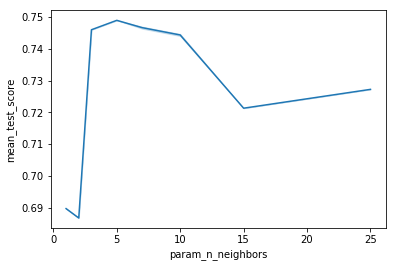

In [1069]:
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=pd.DataFrame(KNN_grid.cv_results_))

## Method2: Logistic Regression - Grid search with Cross validation

In [1070]:
lreg=LogisticRegression(random_state = 0)
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001,0.01,0.1,0.2,0.8,1.2,1.5]
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
GS_lreg = GridSearchCV(lreg, hyperparameters, cv=5, verbose=0)
# Fit grid search
LR_best_model = GS_lreg.fit(X_train, y_train)
y_pred = GS_lreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_lr = pd.DataFrame([['Logistic Regression_GridCV', acc, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Results_all = Results_all.append(model_results_lr, ignore_index = True)

print("Best Train Accuracy score: ",GS_lreg.best_score_)
print("Best parameters:", GS_lreg.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

Best Train Accuracy score:  0.7796442687747036
Best parameters: LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best Test Accuracy score : 0.8017751479289941


/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

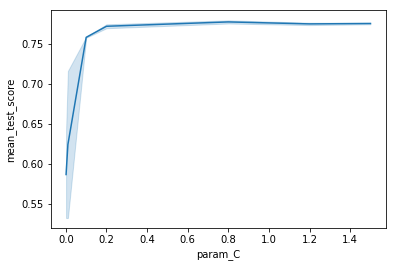

In [1071]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(GS_lreg.cv_results_))

## Method3: Linear SVC - Gridsearch with Cross Validation

In [1072]:
classifier_LinSVM = LinearSVC()
# Grid serach for hyperparameter tuning
param_grid_svm = {'C': [0.001, 0.01, 0.10, 1, 10,100]}  
 
Linsvm_grid = GridSearchCV(classifier_LinSVM, param_grid_svm, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
LinSVM_best_model= Linsvm_grid.fit(X_train, y_train) 
#Predict test data using best model
y_pred=LinSVM_best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')


model_results_Linsvm = pd.DataFrame([['LinearSVM_GridCV', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Results_all = Results_all.append(model_results_Linsvm, ignore_index = True)

print("Best Train Accuracy score: ",Linsvm_grid.best_score_)
print("Best parameters:", Linsvm_grid.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.714, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.704, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.739, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.752, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.632, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.783, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ................................ C=10, score=0.772, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.771, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.754, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.719, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.768, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.772, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.801, total=   0.0s
Best Train Accuracy score:  0.7786561264822134
Best parameters: LinearSVC(C=0

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, i

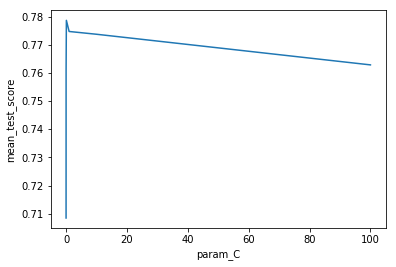

In [1073]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(Linsvm_grid.cv_results_))

## Method4: SVM_lin - Grid search with Cross Validation

In [1074]:
classifier_SVM_lin = SVC()
# Grid serach for hyperparameter tuning 
param_grid_svm_lin = {'C': [0.001,0.01,0.1, 1, 10, 50,100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
svm_lin_grid = GridSearchCV(classifier_SVM_lin, param_grid_svm_lin, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
SVMlin_best_model= svm_lin_grid.fit(X_train, y_train) 
#Predict test data using best model
y_pred = SVMlin_best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_svm = pd.DataFrame([['SVM (Linear)_GridCV', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Results_all = Results_all.append(model_results_svm, ignore_index = True)

print("Best Train Accuracy score: ",svm_lin_grid.best_score_)
print("Best parameters:", svm_lin_grid.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    5.0s finished


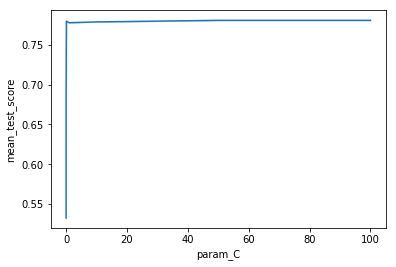

In [1075]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_lin_grid.cv_results_))
#pd.DataFrame(svm_lin_grid.cv_results_)

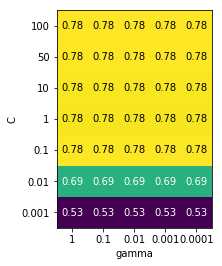

In [1076]:
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_lin_grid.cv_results_).mean_test_score).reshape(7, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_svm_lin['gamma'], ylabel='C', yticklabels=param_grid_svm_lin['C'], cmap="viridis")

## Method5: SVM_rbf - Grid Search with Cross Validation

In [1077]:
classifier_SVM_rbf = SVC()
# Grid search for hyperparameter tuning 
param_grid_svm_rbf = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm_rbf_grid = GridSearchCV(classifier_SVM_rbf, param_grid_svm_rbf, refit = True, verbose = 3, cv = 5, scoring='roc_auc') 
  
# fitting the model for grid search 
SVMrbf_best_model= svm_rbf_grid.fit(X_train, y_train) 
# Predicting test data using best model
y_pred = SVMrbf_best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_SVM_rbf = pd.DataFrame([['SVM(RBF)_GridCV', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

Results_all = Results_all.append(model_results_SVM_rbf, ignore_index = True)

print("Best Train Accuracy score: ",SVMrbf_best_model.best_score_)
print("Best parameters:", SVMrbf_best_model.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.754, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.842, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.832, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.842, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.776, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.826, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.746, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.816, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.807, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.734, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.6s finished


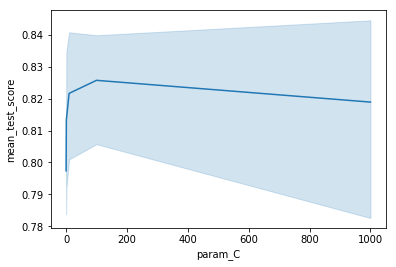

In [1078]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_rbf_grid.cv_results_))
#pd.DataFrame(svm_rbf_grid.cv_results_)

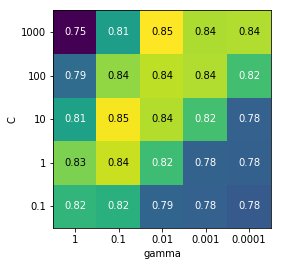

In [1079]:
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_rbf_grid.cv_results_).mean_test_score).reshape(5, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_svm_rbf['gamma'], ylabel='C', yticklabels=param_grid_svm_rbf['C'], cmap="viridis")

## Method6: SVM_poly - Grid Search with Cross Validation

In [1080]:
classifier_SVM_poly = SVC()
# Grid search for hyperparameter tuning 
param_grid_svm_poly = {'C': [0.1, 1, 10, 20, 100], 'degree': [2,3,4],'kernel': ['poly']}  
svm_poly_grid = GridSearchCV(classifier_SVM_poly, param_grid_svm_poly, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
SVMpoly_best_model= svm_poly_grid.fit(X_train, y_train) 
y_pred = SVMpoly_best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_SVM_poly = pd.DataFrame([['SVM(POLY)_GridCV', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

Results_all = Results_all.append(model_results_SVM_poly, ignore_index = True)

print("Best Train Accuracy score: ",svm_poly_grid.best_score_)
print("Best parameters:", svm_poly_grid.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.535, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=0.1, degree=3, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of ga

[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.535, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.768, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.744, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.778, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] .......... C=1, degree=3, kernel=poly, score=0.579, total=   0.0s
[CV] C=1, degree=3, kernel=poly ......................................
[CV] .......... C=1, degree=3, kernel=poly, score=0.572, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.535, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=10, degree=2, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ......... C=10, degree=3, kernel=poly, score=0.749, total=   0.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV] ......... C=10, degree=3, kernel=poly, score=0.773, total=   0.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV] ......... C=10, degree=3, kernel=poly, score=0.762, total=   0.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV] ......... C=10, degree=3, kernel=poly, score=0.746, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.685, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.709, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.704, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ......... C=20, degree=2, kernel=poly, score=0.771, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.793, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.739, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.788, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.767, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.761, total=   0.0s
[CV] C=20, degree=4, kernel=poly .....................................
[CV] ......... C=20, degree=4, kernel=poly, score=0.739, total=   0.0s
[CV] C=20, degree=4, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ........ C=100, degree=2, kernel=poly, score=0.818, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV] ........ C=100, degree=2, kernel=poly, score=0.762, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV] ........ C=100, degree=2, kernel=poly, score=0.781, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.823, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.729, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.793, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.757, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.2s finished
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


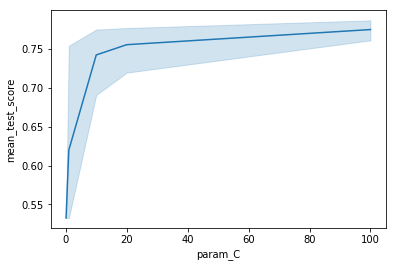

In [1081]:
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_poly_grid.cv_results_))
#pd.DataFrame(svm_poly_grid.cv_results_)

In [1082]:
conda install mglearn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - mglearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1083]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


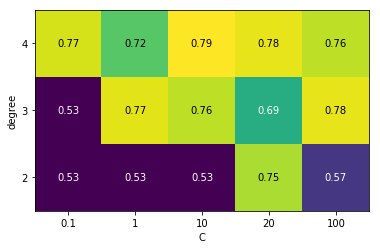

In [1084]:
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_poly_grid.cv_results_).mean_test_score).reshape(3, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid_svm_poly['C'], ylabel='degree', yticklabels=param_grid_svm_poly['degree'], cmap="viridis")

## Method7: Decision tree classifier - Grid search with cross validation

In [1085]:
classifier_dec = DecisionTreeClassifier(random_state = 0)
param_grid_dec = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10],
              "max_depth": [2, 5, 10]
              }
dec_grid = GridSearchCV(classifier_dec, param_grid_dec, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
dec_best_model= dec_grid.fit(X_train, y_train) 

# Predicting Test Set
y_pred = dec_best_model.predict(X_test) 

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_results_dec = pd.DataFrame([['Decision tree_GridCV', acc, prec, rec, f1 ]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
Results_all = Results_all.append(model_results_dec, ignore_index = True)
  
print("Best Train Accuracy score: ",dec_grid.best_score_)
print("Best parameters:", dec_grid.best_estimator_)
print("Best Test Accuracy score :", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.724, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.660, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.754, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.746, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=2, min_samples_split=10, score=0.724, total=   0.0s
[CV] criterion

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, min_samples_split=10, score=0.746, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.754, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.709, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_split=10 ............
[CV]  criterion=entropy, max_depth=5, min_samples_split=1

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


# Model Comparision

In [1086]:
print(Results_all)
Proj1_results=Results_all.copy()

                        Model  Accuracy  Precision    Recall  F1 Score
0                  KNN_GridCV  0.760355   0.782946  0.655844  0.713781
1  Logistic Regression_GridCV  0.801775   0.812950  0.733766  0.771331
2            LinearSVM_GridCV  0.789941   0.798561  0.720779  0.757679
3         SVM (Linear)_GridCV  0.798817   0.811594  0.727273  0.767123
4             SVM(RBF)_GridCV  0.786982   0.810606  0.694805  0.748252
5            SVM(POLY)_GridCV  0.784024   0.809160  0.688312  0.743860
6        Decision tree_GridCV  0.772189   0.829060  0.629870  0.715867


* Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case. 
* In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.
* We can see from the above scores results that, Linear Support Vector Machine has better F1_Score =77.8 %, which is greater than all other models. 
* We can consider this as the best model after applying Grid search and cross validation techniques.

## Best Models: Linear Support Vector Machine model

In [1087]:
LinearSVC_best = Linsvm_grid.best_estimator_
LinearSVC_best.fit(X_train,y_train)
print("Train Set classification report:\n" ,classification_report(y_train, LinearSVC_best.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, LinearSVC_best.predict(X_test)))

Train Set classification report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       539
           1       0.81      0.71      0.76       473

    accuracy                           0.79      1012
   macro avg       0.79      0.78      0.78      1012
weighted avg       0.79      0.79      0.79      1012

Test Set classification report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       184
           1       0.80      0.72      0.76       154

    accuracy                           0.79       338
   macro avg       0.79      0.78      0.79       338
weighted avg       0.79      0.79      0.79       338



Best F1_score for positive class in test set is 76%

# Project2

## Method1: Voting classifier

### 1.1: "hard" Voting classifier

In [1088]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [1089]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
svm_clf = SVC(probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

LogisticRegression 0.8017751479289941
KNeighborsClassifier 0.7603550295857988
SVC 0.7899408284023669
VotingClassifier 0.7899408284023669


### 1.2: "soft" Voting classifier

In [1090]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
svm_clf = SVC(probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'au

LogisticRegression 0.8017751479289941
KNeighborsClassifier 0.7603550295857988
SVC 0.7899408284023669
VotingClassifier 0.7869822485207101


## Method2: Bagging and pasting

### 2.1: Bagging-"DecisionTreeClassifier"

In [1091]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#bag_param_grid = {'n_estimators':[100,200,300,500,700,1000],'max_samples':[10,30,50,100,200],'n_jobs':[-1]}

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf,random_state=0)
#bag_dt_grid = GridSearchCV(bag_clf, bag_param_grid, cv=5)
#best_bag_dt=bag_dt_grid.fit(X_train, y_train)
#y_pred = best_bag_dt.predict(X_test)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.98
Test score: 0.79


In [1092]:
#DEcisionTree Classifier without ensembles
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('Train score without Bagging: {:.2f}'.format(tree_clf.score(X_train, y_train)))
print('Test score without Bagging: {:.2f}'.format(tree_clf.score(X_test, y_test)))

Train score without Bagging: 0.99
Test score without Bagging: 0.74


* Comparing results: From the above results, we can see that Test Score of the Decision tree classifier model has improved after using bagging from 0.74 to 0.79.We can say Bagging is improving the prediction accuracy.

### 2.2: Bagging-"KNeighborsClassifier"

In [1093]:
knn_clf = KNeighborsClassifier()
bag_clf_knn = BaggingClassifier(knn_clf,random_state=0)

bag_clf_knn.fit(X_train, y_train)
y_pred = bag_clf_knn.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf_knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_knn.score(X_test, y_test)))

Train score: 0.83
Test score: 0.78


In [1094]:
#KNeighborsClassifier without ensembles
knn_clf = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Train score: {:.2f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(knn.score(X_test, y_test)))

Train score: 0.82
Test score: 0.76


* Comparing results: From the above results, we can see that Test Score of the KNN model has improved slightly after using bagging.So Bagging is improving the prediction accuracy of KNN Classifier model.

### 2.3: Pasting-"DecisionTreeClassifier"

In [1095]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf_paste = BaggingClassifier(dt_clf,random_state=0,bootstrap=False)

bag_clf_paste.fit(X_train, y_train)
y_pred = bag_clf_paste.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf_paste.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_paste.score(X_test, y_test)))

Train score: 0.99
Test score: 0.74


* Comparing results: From the above results, we can see that Test Score of the Decisiontree classifier model has not improved after using pasting. We can say Pasting is not improving the prediction accuracy.

### 2.4: Pasting-"KNeighborsClassifier"

In [1096]:
knn_clf = KNeighborsClassifier()
bag_clf_pknn = BaggingClassifier(knn_clf,random_state=0,bootstrap=False)

bag_clf_pknn.fit(X_train, y_train)
y_pred = bag_clf_pknn.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf_pknn.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf_pknn.score(X_test, y_test)))

Train score: 0.82
Test score: 0.76


* Comparing results: From the above results, we can see that Test Score of the KNN model(0.76) has not improved after using pasting, and is same.So pasting is not improving the prediction accuracy of KNN Classifier model

## Method3: AdaBoost Boosting

### 3.1: Adaboost on DecisionTreeClassifier

In [1097]:
from sklearn.ensemble import AdaBoostClassifier
dec_tree = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(dec_tree,random_state=0)
ada_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.716


* Comparing results: From the above results, we can see that Test Score of the Decisiontree classifier(0.74) using Adaboost has not improved and is decreasing. We can say Adaboost is not improving the prediction accuracy the model on test set.

### 3.2: Adaboost on LogisticRegression

In [1098]:
from sklearn.ensemble import AdaBoostClassifier
log_reg=LogisticRegression()

ada_clf = AdaBoostClassifier(log_reg,random_state=0)
ada_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.764
Accuracy on test set: 0.778


/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

## Method4: GradientBoosting

In [1099]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_class = GradientBoostingClassifier(random_state=0)
gbrt_class.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_class.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_class.score(X_test, y_test)))

Accuracy on training set: 0.856
Accuracy on test set: 0.808


* Comparing results: From the above results, we can see that Test Score of the GradientBoostingClassifier model is higher compared to other models.

## Method5: Performance of Classification models of project1 on reduced dataset

* Reducing the dataset using PCA to retain 95% variance

In [1100]:
from sklearn.decomposition import PCA
pca_red = PCA(n_components=0.95)
X_train_red = pd.DataFrame(pca_red.fit_transform(X_train))
X_test_red = pd.DataFrame(pca_red.transform(X_test))

In [1101]:
X_train_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
0     1012 non-null float64
1     1012 non-null float64
2     1012 non-null float64
3     1012 non-null float64
4     1012 non-null float64
5     1012 non-null float64
6     1012 non-null float64
7     1012 non-null float64
8     1012 non-null float64
9     1012 non-null float64
10    1012 non-null float64
dtypes: float64(11)
memory usage: 87.1 KB


### 5.1. KNN-GridSearchCV on reduced dataset

Accuracy on training set: 0.829
Accuracy on test set: 0.766
Best parameters: KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


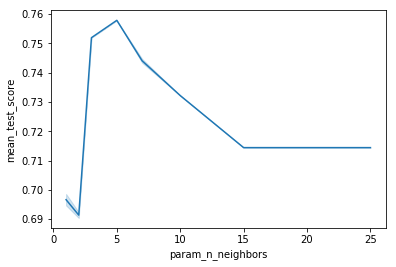

In [1102]:
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':[1,2,3,5,7,10,15,25],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model 5-fold cross validation
KNN_grid = GridSearchCV(knn, knn_param_grid, cv=5)
KNN_grid.fit(X_train_red, y_train)
y_pred=KNN_grid.predict(X_test_red)
#print("Best Accuracy score: ",KNN_grid.best_score_)
#print("Best parameters:", KNN_grid.best_estimator_)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_knn_grid_red = pd.DataFrame([['KNN classifier(GridSearch)_red', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(KNN_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN_grid.score(X_test_red, y_test)))
print("Best parameters:", KNN_grid.best_estimator_)

#plot
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=pd.DataFrame(KNN_grid.cv_results_))

### 5.2.LogisticRegression-GridSearch on reduced dataset

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

Accuracy on training set: 0.779
Accuracy on test set: 0.790
Best parameters: LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


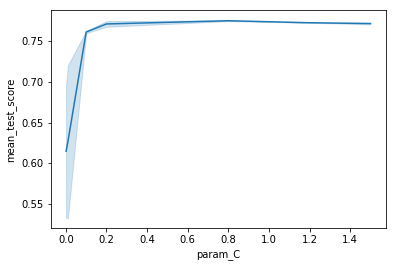

In [1103]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(random_state = 0)
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001,0.01,0.1,0.2,0.8,1.2,1.5]
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 2-fold cross validation
lreg_grid = GridSearchCV(lreg, hyperparameters, cv=5, verbose=0)
# Fit grid search
LR_best_grid = lreg_grid.fit(X_train_red, y_train)
y_pred=LR_best_grid.predict(X_test_red)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_lreg_grid_red = pd.DataFrame([['LogisticRegression(GridSearch)_red', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(LR_best_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(LR_best_grid.score(X_test_red, y_test)))
print("Best parameters:", lreg_grid.best_estimator_)
#PLot
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(lreg_grid.cv_results_))

### 5.3. LinearSVC-GridSearchCV on reduced dataset

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.744, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.704, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.739, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.733, total=   0.0s
[CV] C=0.001 .........................................................
[CV] ............................. C=0.001, score=0.642, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.788, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Libline

[CV] ................................ C=10, score=0.709, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.793, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.782, total=   0.0s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.771, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.813, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.700, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................... C=100, score=0.793, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished


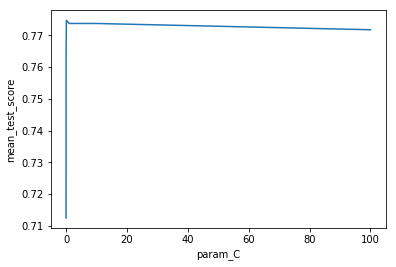

In [1104]:
from sklearn.svm import LinearSVC
classifier_LinSVM = LinearSVC()
# Grid search for hyperparameter tuning
param_grid_svm = {'C': [0.001, 0.01, 0.10, 1, 10,100]}  
 
Linsvm_grid = GridSearchCV(classifier_LinSVM, param_grid_svm, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
LinSVM_best_model= Linsvm_grid.fit(X_train_red, y_train) 
#Predicting test dataset
y_pred = LinSVM_best_model.predict(X_test_red) 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred,pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_linsvm_grid_red = pd.DataFrame([['LinearSVM(GridSearch)_red', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(Linsvm_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(Linsvm_grid.score(X_test_red, y_test)))
print("Best parameters:", Linsvm_grid.best_estimator_)
#plot
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(Linsvm_grid.cv_results_))

### 5.4. SVM_kernel="linear"-GridSearchCV on reduced dataset

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ..... C=0.001, gamma=1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.001, gamma=0.1, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=linear ...............................
[CV] ... C=0.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.532, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.535, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    4.6s finished


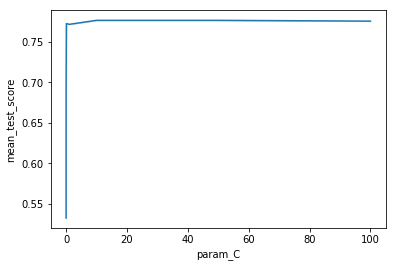

In [1105]:
from sklearn.svm import SVC
classifier_SVM_lin = SVC(random_state = 0)
# Grid serach for hyperparameter tuning 
param_grid_svm_lin = {'C': [0.001,0.01,0.1, 1, 10, 50,100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
svm_lin_grid = GridSearchCV(classifier_SVM_lin, param_grid_svm_lin, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
SVMlin_best_model= svm_lin_grid.fit(X_train_red, y_train) 
#Predicting testset
y_pred = SVMlin_best_model.predict(X_test_red)  
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred,pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_svmlin_grid_red = pd.DataFrame([['SVM_lin(GridSearch)_red', acc, prec, rec, f1 ]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(svm_lin_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_lin_grid.score(X_test_red, y_test)))
print("Best parameters:", svm_lin_grid.best_estimator_)

#Plot
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_lin_grid.cv_results_))

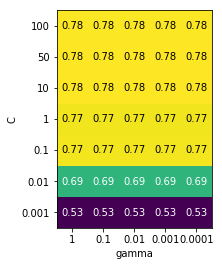

In [1106]:
# plot the mean cross-validation scores
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_lin_grid.cv_results_).mean_test_score).reshape(7, 5)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_svm_lin['gamma'], ylabel='C', yticklabels=param_grid_svm_lin['C'], cmap="viridis")

### 5.5.SVM_kernel="rbf"-GridSearchCV on reduced dataset

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.731, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.714, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.682, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.535, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.532, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.1s finished


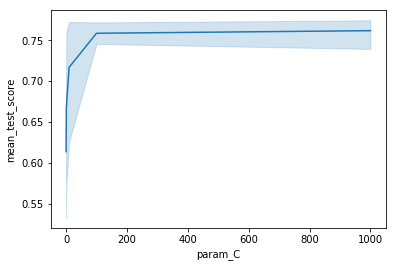

In [1107]:
from sklearn.svm import SVC
classifier_SVM_rbf = SVC(random_state = 0)
# Grid search for hyperparameter tuning 
param_grid_svm_rbf = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm_rbf_grid = GridSearchCV(classifier_SVM_rbf, param_grid_svm_rbf, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
SVMrbf_best_model= svm_rbf_grid.fit(X_train_red, y_train) 
# Predicting test set
y_pred = SVMrbf_best_model.predict(X_test_red) 

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred,pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_svmrbf_grid_red = pd.DataFrame([['SVM_rbf(GridSearch)_red', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(svm_rbf_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_rbf_grid.score(X_test_red, y_test)))
print("Best parameters:", svm_rbf_grid.best_estimator_)

#plot
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_rbf_grid.cv_results_))

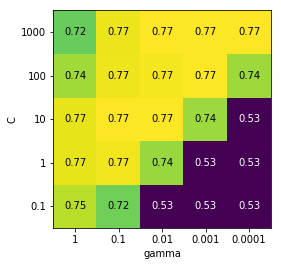

In [1108]:
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_rbf_grid.cv_results_).mean_test_score).reshape(5, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_svm_rbf['gamma'], ylabel='C', yticklabels=param_grid_svm_rbf['C'], cmap="viridis")

### 5.6.SVM_kernel="poly"-GridSearchCV on reduced dataset

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.535, total=   0.0s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV] ........ C=0.1, degree=2, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=0.1, degree=3, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=3, kernel=poly ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of ga

[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.535, total=   0.0s
[CV] C=0.1, degree=4, kernel=poly ....................................
[CV] ........ C=0.1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.616, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.621, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .......... C=1, degree=2, kernel=poly, score=0.606, total=   0.0s
[CV] C=1, degree=2, kernel=poly ......................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] .......... C=1, degree=3, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.535, total=   0.0s
[CV] C=1, degree=4, kernel=poly ......................................
[CV] .......... C=1, degree=4, kernel=poly, score=0.532, total=   0.0s
[CV] C=10, degree=2, kernel=poly .....................................
[CV] ......... C=10, degree=2, kernel=poly, score=0.744, total=   0.0s
[CV] C=10, degree=2, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ......... C=10, degree=3, kernel=poly, score=0.621, total=   0.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV] ......... C=10, degree=3, kernel=poly, score=0.629, total=   0.0s
[CV] C=10, degree=3, kernel=poly .....................................
[CV] ......... C=10, degree=3, kernel=poly, score=0.592, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.542, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.547, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.552, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] ......... C=10, degree=4, kernel=poly, score=0.545, total=   0.0s
[CV] C=10, degree=4, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ......... C=20, degree=3, kernel=poly, score=0.709, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.704, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.690, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.708, total=   0.0s
[CV] C=20, degree=3, kernel=poly .....................................
[CV] ......... C=20, degree=3, kernel=poly, score=0.657, total=   0.0s
[CV] C=20, degree=4, kernel=poly .....................................
[CV] ......... C=20, degree=4, kernel=poly, score=0.596, total=   0.0s
[CV] C=20, degree=4, kernel=poly .....................................
[CV] ......... C=20, degree=4, kernel=poly, score=0.601, total=   0.0s
[CV] C=20, degree=4, kernel=poly .....................................
[CV] .

/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/swetha/opt/anaconda3/lib/python3.

[CV] ........ C=100, degree=2, kernel=poly, score=0.718, total=   0.0s
[CV] C=100, degree=2, kernel=poly ....................................
[CV] ........ C=100, degree=2, kernel=poly, score=0.711, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.788, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.709, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.764, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.762, total=   0.0s
[CV] C=100, degree=3, kernel=poly ....................................
[CV] ........ C=100, degree=3, kernel=poly, score=0.721, total=   0.0s
[CV] C=100, degree=4, kernel=poly ....................................
[CV] .

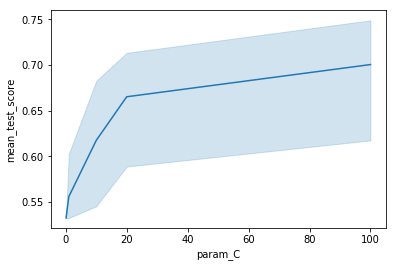

In [1109]:
from sklearn.svm import SVC
classifier_SVM_poly = SVC(random_state = 0)
# Grid search for hyperparameter tuning 
param_grid_svm_poly = {'C': [0.1, 1, 10, 20, 100],   
              'kernel': ['poly'],
                'degree' :[2,3,4]}  
svm_poly_grid = GridSearchCV(classifier_SVM_poly, param_grid_svm_poly, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
SVMpoly_best_model= svm_poly_grid.fit(X_train_red, y_train) 
y_pred = svm_poly_grid.predict(X_test_red) 
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred,pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_svmpoly_grid_red = pd.DataFrame([['SVM_poly(GridSearch)_red', acc, prec, rec, f1 ]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(svm_poly_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_poly_grid.score(X_test_red, y_test)))
print("Best parameters:", svm_poly_grid.best_estimator_)

#PLOT
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(svm_poly_grid.cv_results_))


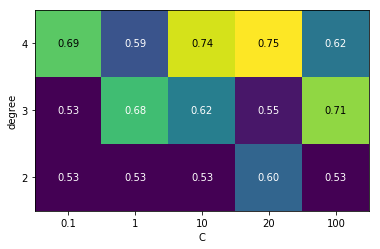

In [1110]:
%matplotlib inline 
import mglearn
scores = np.array(pd.DataFrame(svm_poly_grid.cv_results_).mean_test_score).reshape(3, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid_svm_poly['C'], ylabel='degree', yticklabels=param_grid_svm_poly['degree'], cmap="viridis")

### 5.7. DecisionTreeClassifier-GridSearchCV on reduced dataset

In [1111]:
from sklearn.tree import DecisionTreeClassifier
classifier_dec = DecisionTreeClassifier(random_state = 0)

param_grid_dec = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,10],
              "max_depth": [2, 5, 10]
              }
dec_grid = GridSearchCV(classifier_dec, param_grid_dec, refit = True, verbose = 3, cv = 5) 
  
# fitting the model for grid search 
dec_best_model= dec_grid.fit(X_train_red, y_train) 

# Predicting Test Set
y_pred = dec_best_model.predict(X_test_red) 
  
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label='1')
rec = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred,pos_label='1')

model_dec_grid_red = pd.DataFrame([['DecisionTree(GridSearch)_red', acc, prec, rec, f1 ]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print("Accuracy on training set: {:.3f}".format(dec_grid.score(X_train_red, y_train)))
print("Accuracy on test set: {:.3f}".format(dec_grid.score(X_test_red, y_test)))
print("Best parameters:", dec_grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.739, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.655, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.741, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_split=10 ...............
[CV]  criterion=gini, max_depth=2, min_samples_split=10, score=0.739, total=   0.0s
[CV] criterion

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=10, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_split=10 ..............
[CV]  criterion=gini, max_depth=10, min_samples_split=10, score=0.716, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, score=0.729, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, score=0.655, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, score=0.759, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_split=2 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=2, s

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


## Models comparision from Project1 with models from Project2 on reduced data

* The models in project 1 which were developed on full dataset are compared with models developed on PCA reduced dataset in project2.

In [1112]:
#Project 2 Models results table
Proj2_models= pd.concat([model_knn_grid_red,
           model_lreg_grid_red,model_linsvm_grid_red,model_svmlin_grid_red,
           model_svmrbf_grid_red,model_svmpoly_grid_red
           ,model_dec_grid_red])

In [1113]:
#Comparision table
pd.concat([Proj1_results,Proj2_models],ignore_index=True,sort=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN_GridCV,0.760355,0.782946,0.655844,0.713781
1,Logistic Regression_GridCV,0.801775,0.812950,0.733766,0.771331
2,LinearSVM_GridCV,0.789941,0.798561,0.720779,0.757679
3,SVM (Linear)_GridCV,0.798817,0.811594,0.727273,0.767123
4,SVM(RBF)_GridCV,0.786982,0.810606,0.694805,0.748252
5,SVM(POLY)_GridCV,0.784024,0.809160,0.688312,0.743860
6,Decision tree_GridCV,0.772189,0.829060,0.629870,0.715867
7,KNN classifier(GridSearch)_red,0.766272,0.790698,0.662338,0.720848
8,LogisticRegression(GridSearch)_red,0.789941,0.807407,0.707792,0.754325
9,LinearSVM(GridSearch)_red,0.786982,0.805970,0.701299,0.750000


* From the above results table we can see that, the accuracy scores of the models that were developed on PCA reduced datasets are slightly smaller compared to the accuracy scores of the models developed on full datasets.But in most of the models, the accuracy is approximately same. 

* The models have predicted with sligtly better precision on reduced dataset.

* Hence we can say that even after reducing the datset to retain 95% variance, the models are predicting the output variable "deposite" with good accuracy.

* We can conclude from this, that PCA indeed helps in getting good results with faster analysis. But it is always accuracy variance tradeoff, as we loose variance and some information in the data further by reducing the data using PCA.

Below is the classification report of the best model

In [1114]:
#print(classification_report(y_test, svm_rbf_grid.predict(X_test_red)))

## Deep Learning Models

### Sequential Model from Keras

In [1115]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#### Compile Model

In [1116]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the Model

In [1117]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1012/1012 [==============================] - 0s 204us/step - loss: 0.6746 - accuracy: 0.5988
Epoch 2/150
1012/1012 [==============================] - 0s 73us/step - loss: 0.6421 - accuracy: 0.6630
Epoch 3/150
1012/1012 [==============================] - 0s 76us/step - loss: 0.6141 - accuracy: 0.6818
Epoch 4/150
1012/1012 [==============================] - 0s 80us/step - loss: 0.5866 - accuracy: 0.7164
Epoch 5/150
1012/1012 [==============================] - 0s 79us/step - loss: 0.5608 - accuracy: 0.7283
Epoch 6/150
1012/1012 [==============================] - 0s 82us/step - loss: 0.5398 - accuracy: 0.7490
Epoch 7/150
1012/1012 [==============================] - 0s 86us/step - loss: 0.5237 - accuracy: 0.7599
Epoch 8/150
1012/1012 [==============================] - 0s 96us/step - loss: 0.5116 - accuracy: 0.7530
Epoch 9/150
1012/1012 [==============================] - 0s 90us/step - loss: 0.5010 - accuracy: 0.7638
Epoch 10/150
1012/1012 [==============================] - 0s 92

#### Evaluate the model

In [1118]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

338/338 [==============================] - 0s 83us/step

accuracy: 80.18%


### Using GridSearchCV

In [1119]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#### Creating base model required for KerasClassifier

In [1120]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Training & testing the model

In [1121]:
np.random.seed(10)

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50,100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)
grid_search_result = grid_search.fit(X_train, y_train)

In [1122]:
print('Train score: {:.2f}'.format(grid_search.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grid_search.score(X_test, y_test)))
grid_search.best_params_

Train score: 0.80
Test score: 0.80


{'batch_size': 20, 'epochs': 50}